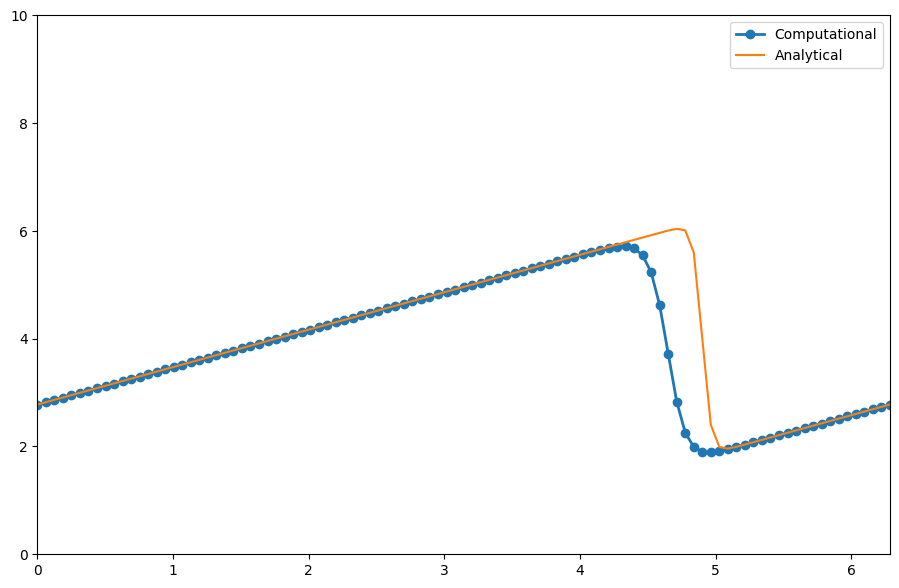

In [26]:
import numpy as np
from matplotlib import pyplot as plt
import sympy
from sympy import symbols
from sympy.utilities.lambdify import lambdify

# Symbolic expression for initial condition
x, nu, t = symbols('x nu t')
phi = sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) + sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1)))
u_func = lambdify((t, x, nu), -2 * nu * phi.diff(x) / phi + 4)

# Discretization
nx = 101
nt = 100
x = np.linspace(0, 2 * np.pi, nx)
dx = 2 * np.pi / (nx - 1)
nu = 0.07
dt = dx * nu

# Initialize u array
u = u_func(0, x, nu)

# Solver (FDM)
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1]) + nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]

# Analytical solution
u_analytical = u_func(nt * dt, x, nu)

# Plotting
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2, label='Computational')
plt.plot(x, u_analytical, label='Analytical')
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.legend()
plt.show()


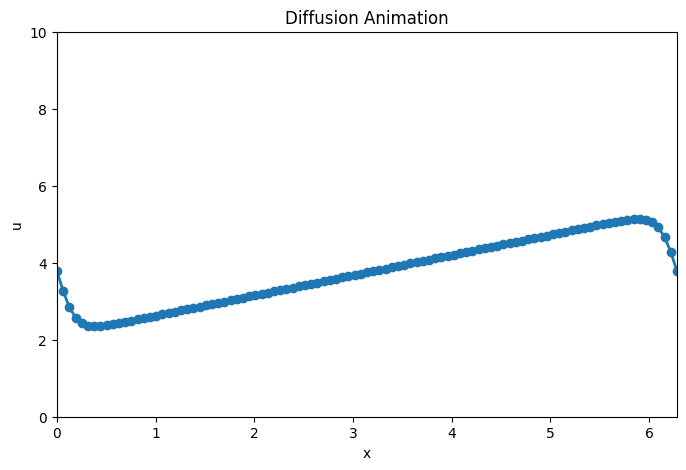

In [27]:

#Animate the code
from matplotlib.animation import FuncAnimation

# Figure setup
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, u, marker='o', lw=2)

# Update function for animation
def update(frame):
    global u

    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1]) + nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]

    line.set_ydata(u)

    return line,

# Animation
animation = FuncAnimation(fig, update, frames=nt, interval=100, blit=True)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10])
plt.xlabel('x')
plt.ylabel('u')
plt.title('Diffusion Animation')

from IPython.display import HTML

animation = FuncAnimation(fig, update, frames=nt, interval=300, blit=True)
HTML(animation.to_html5_video())
